In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

# Load Data

In [2]:
acq_colms=['LoanIdentifier','SellerName', 'OriginalInterestRate', 
           'OriginalUPB', 'OriginalLoanTerm', 'OriginationDate',
           'FirstPaymentDate', 'OriginalLoanToValueLTV', 
           'PrimaryMortgageInsurancePercent', 'OriginalDebtToIncomeRatio', 
           'NumberofBorrowers', 'FirstTimeHomeBuyerIndicator', 
           'BorrowerCreditScoreAtOrigination', 'PropertyState',
           'ZipCodeShort', 'CoBorrowerCreditScoreAtOrigination']

acq_data= pd.read_csv('all_acq_data.txt', sep='|', header=None, names=acq_colms)


In [3]:
acq_data

,LoanIdentifier,SellerName,OriginalInterestRate,OriginalUPB,OriginalLoanTerm,OriginationDate,FirstPaymentDate,OriginalLoanToValueLTV,PrimaryMortgageInsurancePercent,OriginalDebtToIncomeRatio,NumberofBorrowers,FirstTimeHomeBuyerIndicator,BorrowerCreditScoreAtOrigination,PropertyState,ZipCodeShort,CoBorrowerCreditScoreAtOrigination
0,100004457300,"WELLS FARGO BANK, N.A.",3.875,304000,360,11/2014,01/2015,80,0,42,1,0,813,GA,300,0
1,100020572903,OTHER,4.250,348000,360,01/2015,03/2015,70,0,42,1,1,726,TX,787,0
2,100040063822,OTHER,4.375,521000,360,12/2014,02/2015,90,25,23,2,1,783,VA,220,807
3,100047753781,QUICKEN LOANS INC.,4.875,89000,360,02/2015,04/2015,95,30,38,1,1,715,PA,190,0
4,100051904183,OTHER,4.000,261000,360,02/2015,04/2015,95,30,36,2,0,662,KY,400,767
5,100056519703,"WELLS FARGO BANK, N.A.",4.500,249000,360,11/2014,01/2015,95,30,36,1,1,718,IL,604,0
6,100056908658,OTHER,3.750,90000,180,12/2014,02/2015,60,0,37,2,0,693,NC,284,666
7,100069006576,OTHER,4.125,102000,360,12/2014,02/2015,80,0,42,1,0,812,GA,306,0
8,100076786221,OTHER,4.750,216000,360,02/2015,04/2015,80,0,42,1,0,710,CA,923,0
9,100100709559,OTHER,4.875,290000,360,02/2015,04/2015,95,30,42,1,0,624,ND,587,0


In [8]:
#
sample_cols=['LoanIdentifier','OriginalInterestRate','OriginalUPB','OriginalLoanToValueLTV','OriginalDebtToIncomeRatio','FirstTimeHomeBuyerIndicator','BorrowerCreditScoreAtOrigination','PropertyState','Foreclosure']
sampleData11_17= pd.read_csv('Sample2_11_17.txt', sep='|', header=None, names=sample_cols)
sampleData11_17

,LoanIdentifier,OriginalInterestRate,OriginalUPB,OriginalLoanToValueLTV,OriginalDebtToIncomeRatio,FirstTimeHomeBuyerIndicator,BorrowerCreditScoreAtOrigination,PropertyState,Foreclosure
0,846342207516,4.875,74000,78,31,1,647,MI,1
1,680161269066,4.375,250000,95,39,0,687,MI,1
2,518454739715,4.250,89000,90,26,1,812,MN,1
3,733157504446,3.750,84000,97,21,1,769,PA,1
4,731300846362,4.250,82000,95,37,1,687,MN,1
5,382511595031,3.375,43000,66,35,1,796,WI,1
6,940751786856,4.250,60000,97,40,1,700,TN,1
7,530958411561,4.875,168000,95,32,0,692,TX,1
8,238078777656,4.250,76000,85,33,0,681,MN,1
9,646631471071,4.875,113000,95,37,1,670,MN,1


### Random Sample n=

In [4]:
acq_sample1= acq_data.sample(n=10000)
acq_sample1

,LoanIdentifier,SellerName,OriginalInterestRate,OriginalUPB,OriginalLoanTerm,OriginationDate,FirstPaymentDate,OriginalLoanToValueLTV,PrimaryMortgageInsurancePercent,OriginalDebtToIncomeRatio,NumberofBorrowers,FirstTimeHomeBuyerIndicator,BorrowerCreditScoreAtOrigination,PropertyState,ZipCodeShort,CoBorrowerCreditScoreAtOrigination
1488162,605078258188,OTHER,4.375,59000,360,02/2018,04/2018,90,25,48,1,1,670,MI,480,0
1213144,463150899584,OTHER,4.250,104000,360,06/2017,08/2017,70,0,44,2,1,725,TN,372,781
838058,430817952574,PENNYMAC CORP.,3.750,292000,360,11/2016,01/2017,80,0,33,1,0,785,TN,370,0
594797,654677536875,"WELLS FARGO BANK, N.A.",4.125,549000,360,04/2016,06/2016,90,25,42,2,0,732,NY,106,766
1056077,334816555786,"WELLS FARGO BANK, N.A.",5.000,36000,360,03/2017,05/2017,97,25,31,1,1,692,IL,604,0
115748,385437517132,OTHER,3.990,234000,360,05/2015,07/2015,87,25,42,2,0,704,IN,463,712
537399,237790257814,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",3.875,136000,360,03/2016,05/2016,80,0,37,1,1,783,CT,60,0
586912,597795312714,OTHER,3.875,161000,360,03/2016,04/2016,77,0,26,1,0,757,NE,685,0
989910,706096177950,"CALIBER HOME LOANS, INC.",4.550,368000,360,02/2017,04/2017,80,0,45,1,0,683,CA,903,0
121565,437236982438,OTHER,4.100,244000,360,06/2015,08/2015,87,25,39,1,1,748,CT,60,0


### Random sample percentage of data

In [5]:
acq_sample2= acq_data.sample(frac=.10)

if(0.10*(len(acq_data))==len(acq_sample2)):
    print('Good')
    print(len(acq_data),len(acq_sample2))
acq_sample2

,LoanIdentifier,SellerName,OriginalInterestRate,OriginalUPB,OriginalLoanTerm,OriginationDate,FirstPaymentDate,OriginalLoanToValueLTV,PrimaryMortgageInsurancePercent,OriginalDebtToIncomeRatio,NumberofBorrowers,FirstTimeHomeBuyerIndicator,BorrowerCreditScoreAtOrigination,PropertyState,ZipCodeShort,CoBorrowerCreditScoreAtOrigination
1675514,338966112627,"WELLS FARGO BANK, N.A.",4.500,107000,360,06/2018,08/2018,75,0,46.0,2,0,704.0,IA,502,752.0
1409026,826028622350,OTHER,4.000,570000,360,10/2017,12/2017,80,0,43.0,1,0,704.0,NY,112,0.0
459059,401972102869,DITECH FINANCIAL LLC,4.125,109000,360,12/2015,02/2016,97,18,24.0,2,1,724.0,OH,432,669.0
743426,715732902860,OTHER,3.490,254000,360,08/2016,10/2016,95,30,44.0,1,1,741.0,SD,577,0.0
4475,148986296568,"WELLS FARGO BANK, N.A.",3.875,163000,360,11/2014,01/2015,80,0,37.0,1,0,758.0,GA,309,0.0
1654637,212638917817,PENNYMAC CORP.,4.750,173000,360,08/2018,10/2018,95,30,44.0,1,0,755.0,TN,378,0.0
541083,261015782389,OTHER,4.500,114000,360,03/2016,05/2016,95,30,38.0,2,0,728.0,TN,379,680.0
896367,820660416342,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",3.375,314000,360,08/2016,10/2016,90,25,46.0,2,0,793.0,PA,152,756.0
743587,716741000099,SUNTRUST BANK,3.250,280000,360,07/2016,09/2016,86,25,24.0,2,0,806.0,MT,590,797.0
1588501,582873922885,"FLAGSTAR BANK, FSB",4.250,55000,180,04/2018,06/2018,61,0,9.0,1,1,787.0,MO,652,0.0


# Read Performace Data

In [9]:
per_colms= ["LoanIdentifier","MonthlyReportingPeriod","LoanAge",
            "RemainingMonthstoMaturity","AdjustedMonthstoMaturity",
            "MaturityDate", "MetropolitanStatisticalAreaMSA",
            "CurrentLoanDelinquencyStatus", "ForeclosureDate"];
per_data= pd.read_csv('all_Per_Data.txt', sep='|', header=None, names=per_colms)

In [10]:
per_data

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
0,100004457300,01/01/2015,1,359,359,12/2044,12060,0,0
1,100004457300,02/01/2015,2,358,357,12/2044,12060,0,0
2,100004457300,03/01/2015,3,357,356,12/2044,12060,0,0
3,100004457300,04/01/2015,4,356,355,12/2044,12060,0,0
4,100004457300,05/01/2015,5,355,354,12/2044,12060,0,0
5,100004457300,06/01/2015,6,354,353,12/2044,12060,0,0
6,100004457300,07/01/2015,7,353,352,12/2044,12060,0,0
7,100004457300,08/01/2015,8,352,351,12/2044,12060,0,0
8,100004457300,09/01/2015,9,351,350,12/2044,12060,0,0
9,100004457300,10/01/2015,10,350,349,12/2044,12060,0,0


In [11]:
per_data.dtypes

LoanIdentifier                     int64
MonthlyReportingPeriod            object
LoanAge                            int64
RemainingMonthstoMaturity          int64
AdjustedMonthstoMaturity           int64
MaturityDate                      object
MetropolitanStatisticalAreaMSA     int64
CurrentLoanDelinquencyStatus      object
ForeclosureDate                    int64
dtype: object

In [12]:
#Choose from the loan id from the dataframe
SampleData11_17=per_data[per_data.LoanIdentifier.isin(sampleData11_17['LoanIdentifier'])]
SampleData11_17

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
9608,102419798276,03/01/2015,0,360,359,03/2045,37860,0,0
9609,102419798276,04/01/2015,1,359,359,03/2045,37860,0,0
9610,102419798276,05/01/2015,2,358,358,03/2045,37860,0,0
9611,102419798276,06/01/2015,3,357,356,03/2045,37860,0,0
9612,102419798276,07/01/2015,4,356,356,03/2045,37860,0,0
9613,102419798276,08/01/2015,5,355,355,03/2045,37860,0,0
9614,102419798276,09/01/2015,6,354,354,03/2045,37860,0,0
9615,102419798276,10/01/2015,7,353,352,03/2045,37860,0,0
9616,102419798276,11/01/2015,8,352,344,03/2045,37860,0,0
9617,102419798276,12/01/2015,9,351,344,03/2045,37860,0,0


In [14]:
SampleData11_17[(SampleData11_17['ForeclosureDate']==1)]

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
9646,102419798276,05/01/2018,38,322,0,03/2045,37860,D,1
40577,110243508762,10/01/2017,33,327,0,01/2045,0,D,1
51659,112826292653,03/01/2018,37,323,0,02/2045,35380,D,1
83644,120766811006,12/01/2015,9,351,0,03/2045,19460,D,1
90971,122631958306,11/01/2017,34,326,0,01/2045,35380,D,1
159330,139321636606,12/01/2016,23,337,0,01/2045,40140,D,1
229325,156471056226,01/01/2018,35,145,0,02/2030,0,D,1
230971,156956267292,01/01/2016,12,348,0,01/2045,33740,D,1
330990,181921292024,10/01/2018,45,315,0,01/2045,22220,D,1
368519,191535582592,01/01/2017,25,335,0,12/2044,0,D,1


# SAVE RANDOM SAMPLE TO USE FOR REGRESSION

In [15]:
#Regression Random Sample
SampleData11_17.to_csv(r'WorkingSample_11_17.txt', header=False, index=False, sep='|')

## Previous Sample Work

In [9]:
per_data['CurrentLoanDelinquencyStatus']=pd.Categorical(per_data['CurrentLoanDelinquencyStatus'], ordered=True)

### Per Data Random Sample n= 10000

In [10]:
SampleData1=per_data[per_data.LoanIdentifier.isin(acq_sample1['LoanIdentifier'])]
SampleData1

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
5257,101284172637,01/01/2015,-1,361,360.0,02/2045,41740,0,0
5258,101284172637,02/01/2015,0,360,360.0,02/2045,41740,0,0
5259,101284172637,03/01/2015,1,359,359.0,02/2045,41740,0,0
5260,101284172637,04/01/2015,2,358,358.0,02/2045,41740,0,0
5261,101284172637,05/01/2015,3,357,356.0,02/2045,41740,0,0
5262,101284172637,06/01/2015,4,356,355.0,02/2045,41740,0,0
5263,101284172637,07/01/2015,5,355,354.0,02/2045,41740,0,0
5264,101284172637,08/01/2015,6,354,352.0,02/2045,41740,0,0
5265,101284172637,09/01/2015,7,353,351.0,02/2045,41740,0,0
5266,101284172637,10/01/2015,8,352,350.0,02/2045,41740,0,0


In [ ]:
Samp

### Per Data Random Sample 10%

In [11]:
SampleData2=per_data[per_data.LoanIdentifier.isin(acq_sample2['LoanIdentifier'])]
SampleData2

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
188,100056519703,01/01/2015,1,359,359.0,12/2044,16980,0,0
189,100056519703,02/01/2015,2,358,358.0,12/2044,16980,0,0
190,100056519703,03/01/2015,3,357,357.0,12/2044,16980,0,0
191,100056519703,04/01/2015,4,356,355.0,12/2044,16980,0,0
192,100056519703,05/01/2015,5,355,354.0,12/2044,16980,0,0
193,100056519703,06/01/2015,6,354,353.0,12/2044,16980,0,0
194,100056519703,07/01/2015,7,353,353.0,12/2044,16980,0,0
195,100056519703,08/01/2015,8,352,352.0,12/2044,16980,0,0
196,100056519703,09/01/2015,9,351,351.0,12/2044,16980,0,0
197,100056519703,10/01/2015,10,350,349.0,12/2044,16980,0,0


#### Check there are foreclosures included in the sample

In [12]:
# Sample 1 n=10000
SampleData1[SampleData1.ForeclosureDate==1]

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
1616313,492594503054,03/01/2017,24,336,0.0,03/2045,37340,D,1
10010682,407754616360,08/01/2016,13,227,0.0,07/2035,19100,D,1
16586308,742102740417,07/01/2018,30,330,0.0,01/2046,49660,D,1
17413051,922120290558,10/01/2017,23,337,0.0,11/2045,38300,D,1
19955704,698812198941,01/01/2019,36,324,0.0,01/2046,28140,D,1
20578708,870128479909,11/01/2016,10,350,0.0,01/2046,33460,D,1
27771736,538400326945,03/01/2019,32,328,0.0,07/2046,46340,D,1
45148446,618679204817,10/01/2018,13,347,0.0,09/2047,37900,D,1


In [13]:
#Sample 2 Sample 10% of data
SampleData2[SampleData2.ForeclosureDate==1]

,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
9703,102419798276,05/01/2018,38,322,0.0,03/2045,37860,D,1
36216,109204553328,04/01/2019,49,311,0.0,03/2045,37980,D,1
297229,173679236451,06/01/2017,29,331,0.0,01/2045,37900,D,1
397944,198245342539,11/01/2016,22,338,0.0,01/2045,0,D,1
470985,215949038274,11/01/2018,46,314,0.0,01/2045,38300,D,1
590040,245656475585,03/01/2019,49,465,0.0,12/2057,40900,D,1
786245,293270415320,06/01/2017,29,331,0.0,01/2045,0,D,1
850404,308230265901,03/01/2018,38,322,0.0,01/2045,43340,D,1
939903,330990233643,12/01/2018,49,311,0.0,11/2044,36500,D,1
1099783,369282819808,11/01/2018,48,312,0.0,11/2044,11020,D,1


In [14]:
per_dataID=SampleData1.reset_index()
per_ID=per_dataID.rename(columns={'index':'ID'})
per_ID

,ID,LoanIdentifier,MonthlyReportingPeriod,LoanAge,RemainingMonthstoMaturity,AdjustedMonthstoMaturity,MaturityDate,MetropolitanStatisticalAreaMSA,CurrentLoanDelinquencyStatus,ForeclosureDate
0,5257,101284172637,01/01/2015,-1,361,360.0,02/2045,41740,0,0
1,5258,101284172637,02/01/2015,0,360,360.0,02/2045,41740,0,0
2,5259,101284172637,03/01/2015,1,359,359.0,02/2045,41740,0,0
3,5260,101284172637,04/01/2015,2,358,358.0,02/2045,41740,0,0
4,5261,101284172637,05/01/2015,3,357,356.0,02/2045,41740,0,0
5,5262,101284172637,06/01/2015,4,356,355.0,02/2045,41740,0,0
6,5263,101284172637,07/01/2015,5,355,354.0,02/2045,41740,0,0
7,5264,101284172637,08/01/2015,6,354,352.0,02/2045,41740,0,0
8,5265,101284172637,09/01/2015,7,353,351.0,02/2045,41740,0,0
9,5266,101284172637,10/01/2015,8,352,350.0,02/2045,41740,0,0


In [15]:
per_ID.to_csv(r'Per_RandomSample.txt', header=False, index=False, sep='|')

In [16]:
filteredData=acq_data[acq_data.LoanIdentifier.isin(per_ID['LoanIdentifier'])]
filteredData

,LoanIdentifier,SellerName,OriginalInterestRate,OriginalUPB,OriginalLoanTerm,OriginationDate,FirstPaymentDate,OriginalLoanToValueLTV,PrimaryMortgageInsurancePercent,OriginalDebtToIncomeRatio,NumberofBorrowers,FirstTimeHomeBuyerIndicator,BorrowerCreditScoreAtOrigination,PropertyState,ZipCodeShort,CoBorrowerCreditScoreAtOrigination
117,101284172637,OTHER,4.125,417000,360,01/2015,03/2015,78,0,37.0,2,1,700.0,CA,920,720.0
401,104382663229,OTHER,4.000,390000,360,01/2015,03/2015,95,30,42.0,2,1,777.0,CA,939,753.0
449,105118945322,OTHER,3.750,135000,240,02/2015,04/2015,64,0,25.0,2,0,803.0,NH,33,801.0
1106,112119268012,FREEDOM MORTGAGE CORP.,4.250,334000,360,11/2014,01/2015,80,0,35.0,1,1,729.0,VA,201,0.0
1212,113118958812,"WELLS FARGO BANK, N.A.",3.500,353000,360,12/2014,02/2015,90,25,41.0,2,1,764.0,PA,184,809.0
1472,115974696878,OTHER,4.125,357000,360,03/2015,05/2015,80,0,44.0,2,0,801.0,FL,321,775.0
1564,117055552797,OTHER,3.850,133000,360,03/2015,05/2015,95,30,41.0,1,1,710.0,OH,441,0.0
1576,117168335830,OTHER,4.625,23000,360,12/2014,02/2015,70,0,18.0,1,1,649.0,IL,616,0.0
1632,117813876453,DITECH FINANCIAL LLC,4.125,196000,360,12/2014,02/2015,92,25,22.0,2,0,780.0,IN,465,790.0
1909,120724532313,"WELLS FARGO BANK, N.A.",4.750,380000,360,01/2015,03/2015,95,30,17.0,1,1,649.0,PA,168,0.0


In [19]:
filteredData.to_csv(r'Acq_RandomSampleIDs.txt', header=False, index=False, sep='|')

# Random Sample Distribution

D:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


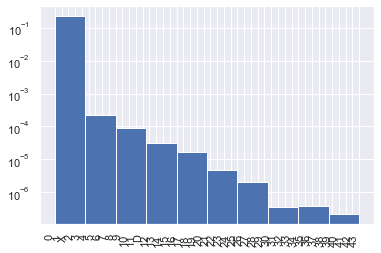

<Figure size 720x864 with 0 Axes>

In [25]:
#Current Loan Delinquency Status Distribution
hist=SampleData2['CurrentLoanDelinquencyStatus'].hist(normed=True)
plt.yscale('log')
plt.figure(figsize=(10,12))
plt.setp(hist.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()